## AIR TRANSPORT
### Flight Delays

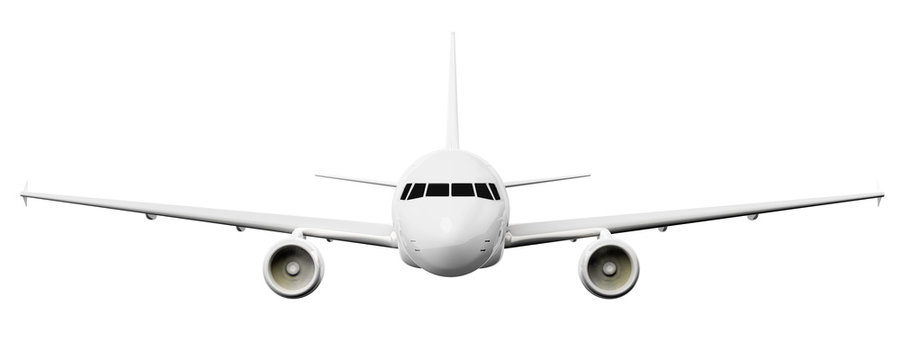

* Con este analisis se busca predecir retrasos aéreos superiores a 15 minutos. Esta predicción es crucial para la aerolínea, ya que nos permitira conocer donde se pueden minimizar costos operativos (evitando acumulación de retrasos).
Ademas se busca areas de mejora para la experiencia del cliente (menos molestias, mayor fidelidad).
Permitir planificación anticipada, mejorando la eficiencia operativa.
Con los modelos a desarrollar (Random Forest, Logistic Regression y KNN), se pueden tomar decisiones estratégicas para prevenir o mitigar los retrasos, optimizar horarios, asignar recursos eficientemente y ofrecer soluciones proactivas a los pasajeros.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
data= pd.read_csv('Airline_Delay_Cause.csv')

In [6]:
data

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2024,11,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",82.0,15.0,7.72,0.00,...,0.00,3.89,0.0,0.0,550.0,301.0,0.0,107.0,0.0,142.0
1,2024,11,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",8.0,0.0,0.00,0.00,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2024,11,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",82.0,10.0,5.05,1.00,...,0.00,2.49,0.0,2.0,559.0,298.0,55.0,48.0,0.0,158.0
3,2024,11,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",75.0,3.0,2.00,0.00,...,0.00,1.00,0.0,0.0,93.0,73.0,0.0,0.0,0.0,20.0
4,2024,11,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",91.0,10.0,2.53,0.00,...,0.00,3.61,0.0,0.0,406.0,196.0,0.0,110.0,0.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20678,2024,1,WN,Southwest Airlines,RDU,"Raleigh/Durham, NC: Raleigh-Durham International",685.0,191.0,74.25,1.66,...,1.13,85.13,27.0,4.0,9326.0,3248.0,317.0,1012.0,37.0,4712.0
20679,2024,1,WN,Southwest Airlines,RIC,"Richmond, VA: Richmond International",140.0,35.0,14.17,0.00,...,0.00,17.81,0.0,0.0,1384.0,578.0,0.0,107.0,0.0,699.0
20680,2024,1,WN,Southwest Airlines,RNO,"Reno, NV: Reno/Tahoe International",705.0,134.0,39.02,0.52,...,0.08,80.49,12.0,7.0,6313.0,1464.0,75.0,1012.0,2.0,3760.0
20681,2024,1,WN,Southwest Airlines,ROC,"Rochester, NY: Frederick Douglass Grtr Rochest...",170.0,51.0,23.59,1.11,...,1.00,19.85,4.0,1.0,2520.0,1121.0,130.0,233.0,37.0,999.0


In [7]:
data.tail()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
20678,2024,1,WN,Southwest Airlines,RDU,"Raleigh/Durham, NC: Raleigh-Durham International",685.0,191.0,74.25,1.66,...,1.13,85.13,27.0,4.0,9326.0,3248.0,317.0,1012.0,37.0,4712.0
20679,2024,1,WN,Southwest Airlines,RIC,"Richmond, VA: Richmond International",140.0,35.0,14.17,0.00,...,0.00,17.81,0.0,0.0,1384.0,578.0,0.0,107.0,0.0,699.0
20680,2024,1,WN,Southwest Airlines,RNO,"Reno, NV: Reno/Tahoe International",705.0,134.0,39.02,0.52,...,0.08,80.49,12.0,7.0,6313.0,1464.0,75.0,1012.0,2.0,3760.0
20681,2024,1,WN,Southwest Airlines,ROC,"Rochester, NY: Frederick Douglass Grtr Rochest...",170.0,51.0,23.59,1.11,...,1.00,19.85,4.0,1.0,2520.0,1121.0,130.0,233.0,37.0,999.0
20682,2024,1,WN,Southwest Airlines,RSW,"Fort Myers, FL: Southwest Florida International",700.0,227.0,58.92,1.76,...,0.00,85.15,17.0,1.0,12562.0,3962.0,149.0,3151.0,0.0,5300.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20683 entries, 0 to 20682
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 20683 non-null  int64  
 1   month                20683 non-null  int64  
 2   carrier              20683 non-null  object 
 3   carrier_name         20683 non-null  object 
 4   airport              20683 non-null  object 
 5   airport_name         20683 non-null  object 
 6   arr_flights          20668 non-null  float64
 7   arr_del15            20663 non-null  float64
 8   carrier_ct           20668 non-null  float64
 9   weather_ct           20668 non-null  float64
 10  nas_ct               20668 non-null  float64
 11  security_ct          20668 non-null  float64
 12  late_aircraft_ct     20668 non-null  float64
 13  arr_cancelled        20668 non-null  float64
 14  arr_diverted         20668 non-null  float64
 15  arr_delay            20668 non-null 

data.describe()


In [10]:
print(data.columns)

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')


## DATA CLEANING

* Cuando los missing values son pocos, se pueden eliminar sin afectar el analisis.
* Usamos Dropna para eliminar los valores nulos.
* Convertimos las variables categoricas en numericas con LabelEncoder. 
* Verificamos duplicados y que ya no hayan missing values.

In [13]:
data.isnull().sum()

year                    0
month                   0
carrier                 0
carrier_name            0
airport                 0
airport_name            0
arr_flights            15
arr_del15              20
carrier_ct             15
weather_ct             15
nas_ct                 15
security_ct            15
late_aircraft_ct       15
arr_cancelled          15
arr_diverted           15
arr_delay              15
carrier_delay          15
weather_delay          15
nas_delay              15
security_delay         15
late_aircraft_delay    15
dtype: int64

In [14]:
data_cleaned = data.dropna()

In [15]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()

cat_cols = data_cleaned.select_dtypes(include=['object']).columns

for col in cat_cols:
       data_cleaned.loc[:, col] = le.fit_transform(data_cleaned[col])


In [16]:
print(data_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 20663 entries, 0 to 20682
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 20663 non-null  int64  
 1   month                20663 non-null  int64  
 2   carrier              20663 non-null  object 
 3   carrier_name         20663 non-null  object 
 4   airport              20663 non-null  object 
 5   airport_name         20663 non-null  object 
 6   arr_flights          20663 non-null  float64
 7   arr_del15            20663 non-null  float64
 8   carrier_ct           20663 non-null  float64
 9   weather_ct           20663 non-null  float64
 10  nas_ct               20663 non-null  float64
 11  security_ct          20663 non-null  float64
 12  late_aircraft_ct     20663 non-null  float64
 13  arr_cancelled        20663 non-null  float64
 14  arr_diverted         20663 non-null  float64
 15  arr_delay            20663 non-null  floa

In [17]:
data.duplicated().sum()

0

In [18]:
data_cleaned.isnull().sum()

year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64

### Total delay distribution in minutes

Este grafico muestra la distribucion de los retrasos totales en minutos. 
Podemos obseevar en le grafico que la mayoria de los valores se concentran cerca de el valor 0 minutos, por lo que la mayioria
de los vuelos tienen retrasos bajos. 
Sin embargo, se logra observar un pequeno valor de vuelos con retrasos extremadamente largos de hasta 600,000 minutos, 
es decir mas de 400 dias, por lo que podria ser un error. 
dias= minutos / 60 x 24 
600,000/ 60x24 = 600,000/1,440 = 416.67 dias. 

Queremos realizar un mejor analisis, por lo que decidimos eliminar los valores atipicos.

Filtramos retrasos menores a 5000 minutos.

In [21]:
dias = 600000 / (60*24)
print(dias)

416.6666666666667


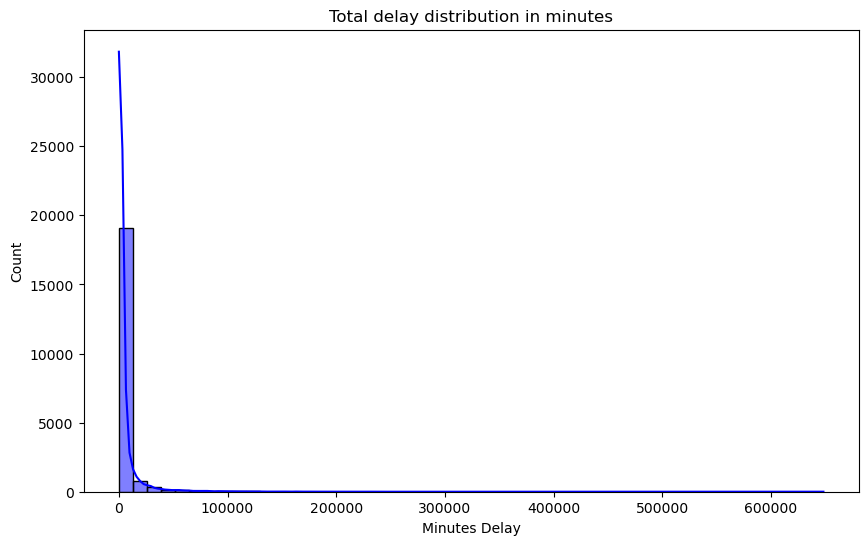

In [22]:
data["total_delay"] = data[["carrier_delay", "weather_delay", "nas_delay", "security_delay", "late_aircraft_delay"]].sum(axis=1)

plt.figure(figsize=(10, 6))
sns.histplot(data["total_delay"], bins=50, kde=True, color='blue')
plt.title("Total delay distribution in minutes")
plt.xlabel("Minutes Delay")
plt.show()

### Total distribution of delays in minutes (no outliers)

Filtramos los retrasos mayores a 5000 minutos.

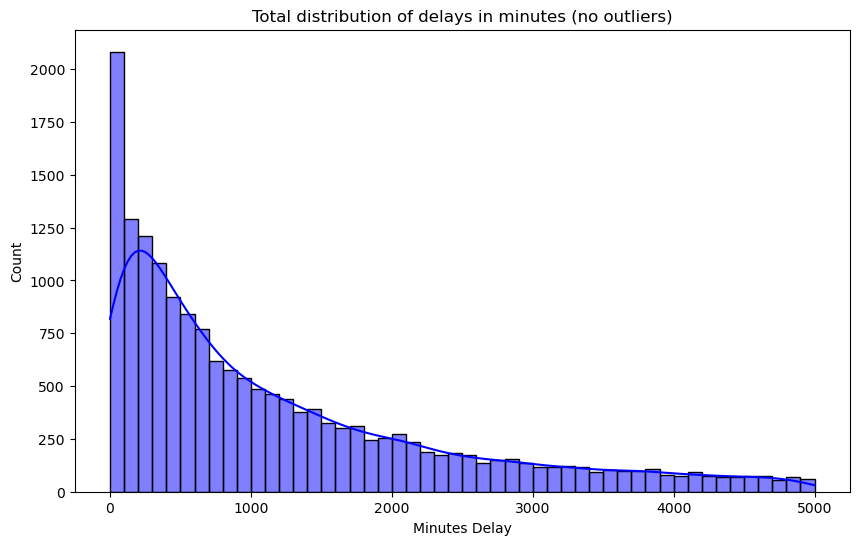

In [24]:
data_filtered = data[data["total_delay"] < 5000]  

plt.figure(figsize=(10, 6))
sns.histplot(data_filtered["total_delay"], bins=50, kde=True, color='blue')
plt.title("Total distribution of delays in minutes (no outliers)")
plt.xlabel("Minutes Delay")
plt.show()


#### Data pre-processing

* Vamos a definir la variable objetivo: 'arr_del15'. Esta variable indica si un vuelo tuvo un retraso mayor a 15 minutos (1 = sí, 0 = no).
* Se transformó la variable arr_del15 (retraso en minutos) en una variable categórica binaria (delay_15min), para convertir el problema en uno de clasificación.
* 1: Vuelo con retraso mayor a 15 minutos.
  0: Vuelo puntual o con retraso igual o menor a 15 minutos.
* Esta transformación responde al objetivo de negocio: identificar si un vuelo se retrasa o no, lo cual tiene implicaciones directas en planificación y satisfacción del cliente.
  
* Posteriormente dividimos en datos de prueba y entrenamiento.
* 80% para entrenamiento
  20% para prueba
  
* Escalamos las variables. 

In [27]:
data_cleaned = data.dropna().copy()

In [28]:
data_cleaned.loc[:, 'delay_15min'] = data_cleaned['arr_del15'].apply(lambda x: 1 if x > 15 else 0)

In [29]:
y = data_cleaned['delay_15min']
X = data_cleaned.drop(columns=['arr_del15', 'delay_15min'])

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# MODELS

### Random Forest

* Se utiliza Random Forest, ya que es un modelo robusto, basado en muchos árboles de decisión, que maneja bien datos con muchas variables (numéricas y categóricas)
* Este modelo es ideal para predecir si un vuelo se retrasa basándose en múltiples factores, como la aerolínea, hora, clima, entre otros.
*  Podemos ver la cantidad de vuelos mayores a 15 minutos de retraso: 1    10713 y los vuelos sin retraso 0     9950.
* Se limita la cantidad y tamano de arboles para que se puedan analizar. Se usa 50 arboles en lugar de 100 y limita su profundida a 10 nivles. 
* Al ser muchos datos se pueden presentar problemas de datos de memoria en la maquina.

In [33]:
print(y.value_counts())
print("Número de clases:", y.nunique())

delay_15min
1    10713
0     9950
Name: count, dtype: int64
Número de clases: 2


In [34]:
from sklearn.preprocessing import LabelEncoder

X_encoded = X.copy()

categorical_cols = X_encoded.select_dtypes(include=['object']).columns

le = LabelEncoder()
for col in categorical_cols:
    X_encoded[col] = le.fit_transform(X_encoded[col])

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, n_estimators=50, random_state=42)

In [36]:
y_pred = model.predict(X_test)

## Confusion Matrix

* Permite saber si el modelo identifica correctamente los vuelos con más de 15 minutos de retraso.
* Vemos que los resultados nos muestran:
* 1968: Predicciones correctas de vuelos sin retraso.
* 2092: Predicciones correctas de vuelos con retraso >15 min.
* 31 y 42: Errores del modelo, pero muy pocos en comparación con los aciertos.
  
* Precision 0 (sin retraso): 0.98: De todos los vuelos predichos como sin retraso, el 98% realmente no lo estaban.

* Recall 0: 0.98: De todos los vuelos que no estaban retrasados, el modelo identificó correctamente el 98%.

* Lo mismo ocurre con la clase 1 (retrasado): precision: De todos los vuelos predichos como retraso, el 99% realmente lo estaban.

* Accuracy: 0.98:  El modelo predice correctamente el 98% de los casos.
  
* El grafico de confusion matrix, nos permite observar esta informacion con claridad. 
* Para el grafico se escoge: coolwarm, porque nos permite Comparar positivos vs. negativos (bicolor).

In [39]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9823372852649407
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1999
           1       0.99      0.98      0.98      2134

    accuracy                           0.98      4133
   macro avg       0.98      0.98      0.98      4133
weighted avg       0.98      0.98      0.98      4133

Matriz de confusión:
 [[1968   31]
 [  42 2092]]


In [40]:
accuracy_rf = accuracy_score(y_test, y_pred)

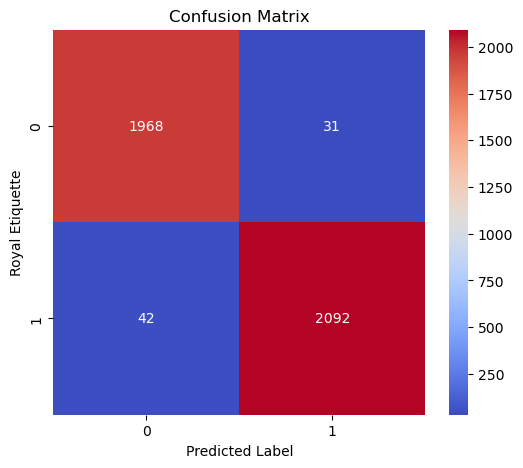

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Royal Etiquette")
plt.show()


### Cross-validation

* para verificar que el modelo no esté sobreajustado:
* cross-validated accuracy: 0.9785608666720227: indica que el modelo no esra sobreajustado.
------------------------------------------------------------------

* total_delay (suma de retrasos) es el predictor más fuerte: tiene sentido, ya que si hay mucho retraso acumulado, hay más probabilidad de que un vuelo se retrase.

* carrier_ct, late_aircraft_ct, arr_delay también son lógicos, ya que reflejan congestión por aerolínea, demoras anteriores, etc.

* Variables con baja importancia (weather_delay, etc.) aportan poco al modelo.


In [43]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_encoded, y, cv=5, scoring='accuracy')
print("Cross-validated accuracy:", scores.mean())


Cross-validated accuracy: 0.9785608666720227


In [44]:
import pandas as pd
feature_importances = pd.Series(model.feature_importances_, index=X_encoded.columns)
feature_importances.sort_values(ascending=False).head(10)

total_delay            0.200677
carrier_ct             0.143792
late_aircraft_ct       0.126649
arr_delay              0.106073
arr_flights            0.097293
carrier_delay          0.080150
nas_delay              0.070258
late_aircraft_delay    0.063357
nas_ct                 0.062211
weather_delay          0.014527
dtype: float64

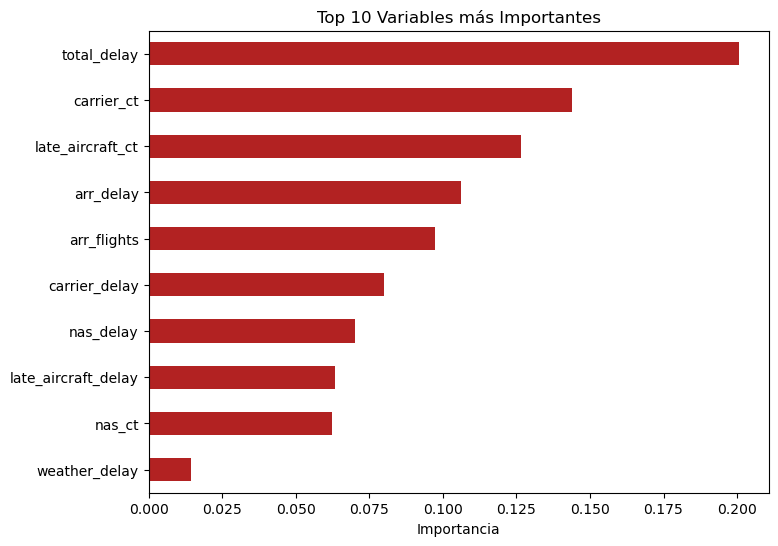

In [45]:
import pandas as pd

feature_importances = pd.Series(model.feature_importances_, index=X_encoded.columns)
top_features = feature_importances.sort_values(ascending=True).tail(10)

plt.figure(figsize=(8, 6))
top_features.plot(kind='barh', color ='firebrick')
plt.title("Top 10 Variables más Importantes")
plt.xlabel("Importancia")
plt.show()


## Hyperparameters

* Los hiperparámetros se utilizan para controlar el comportamiento del modelo de machine learning.
* Ajustar hiperparámetros permite que el modelo se adapte mejor al problema sin caer en errores por subajuste o sobreajuste.
* Árboles con 50, 100 o 200 estimadores. Profundidades máximas de 10, 20 o sin límite.
* Usa validación cruzada (cv=3): divide los datos en 3 partes para asegurar que los resultados no dependan de un solo split.
*  De todas las combinaciones que probé, el modelo con 200 árboles, cada uno con una profundidad máxima de 20, dividiendo nodos si hay al menos 5 muestras, y permitiendo hojas con mínimo 1 muestra, fue el que mejor predijo en la validación cruzada.

#### after using the best hyperparameters

Ahora solo 28 y 35 errores por clase, lo que significa un mejor rendimiento global.

La accuracy sube de 98.23% a 98.98%.

La precisión, el recall y el f1-score para ambas clases son iguales o superiores al 0.99, lo cual indica:

Alta sensibilidad (recall): pocos falsos negativos.

Alta precisión: pocos falsos positivos.

In [79]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                           param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

In [80]:
print("Best hyperparameters found")
print(grid_search.best_params_)

Best hyperparameters found
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [84]:
best_model = grid_search.best_estimator_


In [90]:
y_pred = best_model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9847568352286474
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1999
           1       0.99      0.98      0.99      2134

    accuracy                           0.98      4133
   macro avg       0.98      0.98      0.98      4133
weighted avg       0.98      0.98      0.98      4133

Confusion matrix:
 [[1971   28]
 [  35 2099]]
